In [124]:
import pyKriging as krige

In [125]:
import numpy as np

In [126]:
import time

In [127]:
x = np.genfromtxt('x_raw.csv', delimiter=',')

In [128]:
y = np.genfromtxt('y_raw.csv', delimiter=',')

In [129]:
q=np.random.choice(400,400,replace=False)

In [130]:
xprime=x[q]
yprime=y[q]

In [131]:
x_train = xprime[:300]
y_train = yprime[:300]

In [133]:
np.savetxt('x_shuffled.csv',xprime, delimiter=',')
np.savetxt('y_shuffled.csv', yprime, delimiter=',')

In [134]:
start = time.time()
k = krige.kriging(x_train, y_train)  
k.train()
stop = time.time()
print(stop-start)

772.0006568431854


In [135]:
start = time.time()
y_predict = []
for i in range(0,len(x)):
    y_predict.append(k.predict(xprime[i]))
stop = time.time()
print(stop-start)

1.4066524505615234


array([2.55175040e+09, 3.72709602e-01, 4.53587745e-06, 3.22792213e-04,
       2.88061646e+02, 1.57760158e-01, 9.84434448e+02, 2.77741260e+03,
       6.38566256e-01, 1.95803142e+00, 8.50787328e-04, 4.14548926e+03,
       8.87892395e+02, 2.92763306e+02, 2.40514363e-20])

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14


array([[1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [1.1670141 , 0.93738555, 1.94255632, ..., 1.00420458, 1.00242118,
        2.67298345],
       [0.9822806 , 0.85588098, 1.88928067, ..., 0.92386055, 1.00093263,
        0.37515864],
       ...,
       [0.95455485, 0.9257811 , 2.17064254, ..., 1.01111318, 1.00261506,
        2.63074344],
       [1.1727849 , 0.90722145, 1.7958835 , ..., 0.88633292, 1.00253261,
        2.0292911 ],
       [0.93996022, 0.89570056, 0.63281809, ..., 1.0037117 , 1.00028405,
        1.762566  ]])

Init signature: GPy.models.GPRegression(*args, **kw)
Docstring:     
Gaussian Process model for regression

This is a thin wrapper around the models.GP class, with a set of sensible defaults

:param X: input observations
:param Y: observed values
:param kernel: a GPy kernel, defaults to rbf
:param Norm normalizer: [False]
:param noise_var: the noise variance for Gaussian likelhood, defaults to 1.

    Normalize Y with the norm given.
    If normalizer is False, no normalization will be done
    If it is None, we use GaussianNorm(alization)

.. Note:: Multiple independent outputs are allowed using columns of Y
File:           /usr/local/lib/python3.7/dist-packages/GPy/models/gp_regression.py
Type:           ParametersChangedMeta


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14


Widget Javascript not detected.  It may not be installed or enabled properly.


 /usr/local/lib/python3.7/dist-packages/paramz/transformations.py:108: RuntimeWarning:invalid value encountered in greater
 /usr/local/lib/python3.7/dist-packages/GPy/util/linalg.py:63: RuntimeWarning:invalid value encountered in less_equal
 /usr/local/lib/python3.7/dist-packages/paramz/transformations.py:113: RuntimeWarning:invalid value encountered in greater


TypeError: unsupported format string passed to NoneType.__format__

In [136]:
np.savetxt('y_predict_python.csv', y_predict, delimiter=',')

In [137]:
import matplotlib.pyplot as plt

ValueError: x and y must be the same size

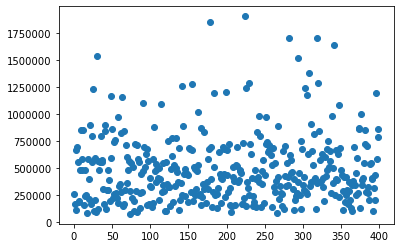

In [169]:
linaxis=range(0,400)
plt.scatter(linaxis, yprime)
plt.scatter(linaxis,y_predict)
plt.scatter(linaxis, yprime-y_predict)